# FASHION MNSIT PROJECT

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

STEP 1 : IMPORTING THE DATA

In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [2]:
#importing the dataset
dataset = pd.read_csv(r'C:\Users\ARPITA KUMARI\.spyder-py3\fashion-mnist_train.csv')

In [3]:
print(dataset.shape)

(60000, 785)


In [5]:
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dataset.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#convert image to array
dataframe = np.array(dataset, dtype = 'float32')

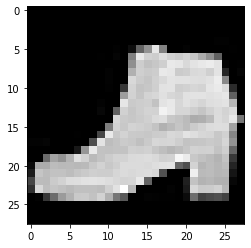

In [5]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(dataframe[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow(dataframe[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# The 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


STEP 2 : TRAINING THE MODEL

In [9]:
#prepare the X and Y(TRAINING SET & TEST SET)
X = dataframe[:,1:]/255
y = dataframe[:,0]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
#unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

STEP 3: FITTING CNN MODEL TO THE IMAGE DATASET

In [16]:
#importing the keras library
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [17]:
#initialising the CNN
classifier = Sequential()

# step 1 - CONVOLUTION
classifier.add(Convolution2D(64, 3, 3 , input_shape = (28, 28, 1), activation = 'relu'))

# step 2 - MAX POOLING
classifier.add(MaxPooling2D(pool_size = (2 , 2)))
classifier.add(Dropout(0.25))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))

#compliling the ANN
classifier.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
result = classifier.fit(X_train, y_train, verbose = 1, epochs = 50,batch_size = 512, validation_data = (X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 9s 183us/sample - loss: 1.3199 - accuracy: 0.5594 - val_loss: 0.7397 - val_accuracy: 0.7308
Epoch 2/50
48000/48000 [==============================] - 9s 184us/sample - loss: 0.6979 - accuracy: 0.7419 - val_loss: 0.6088 - val_accuracy: 0.7798
Epoch 3/50
48000/48000 [==============================] - 10s 206us/sample - loss: 0.6099 - accuracy: 0.7748 - val_loss: 0.5587 - val_accuracy: 0.7952
Epoch 4/50
48000/48000 [==============================] - 10s 216us/sample - loss: 0.5676 - accuracy: 0.7897 - val_loss: 0.5312 - val_accuracy: 0.8037
Epoch 5/50
48000/48000 [==============================] - 11s 219us/sample - loss: 0.5377 - accuracy: 0.8039 - val_loss: 0.5061 - val_accuracy: 0.8146
Epoch 6/50
48000/48000 [==============================] - 10s 218us/sample - loss: 0.5176 - accuracy: 0.8096 - val_loss: 0.4866 - val_accuracy: 0.8255
Epoch 7/50
48000/48000 [======================

VISULAISING THE TEST SET RESULTS

In [19]:
#importing the dataset
dataset_t = pd.read_csv(r'C:\Users\ARPITA KUMARI\.spyder-py3\fashion-mnist_test.csv')

In [20]:
#convert image to array
dataframe_t = np.array(dataset_t, dtype = 'float32')

In [21]:
#prepare the X and Y
X_t = dataframe_t[:,1:]/255
y_t = dataframe_t[:,0]

In [22]:
X_t = X_t.reshape(X_t.shape[0], *(28, 28, 1))

In [23]:
evaluation = classifier.evaluate(X_t, y_t)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [24]:
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

Test Accuracy : 0.876


In [25]:
# get the predictions for the test data
predicted_classes = classifier.predict_classes(X_test)

In [26]:
predicted_classes

array([1, 6, 8, ..., 2, 9, 3], dtype=int64)

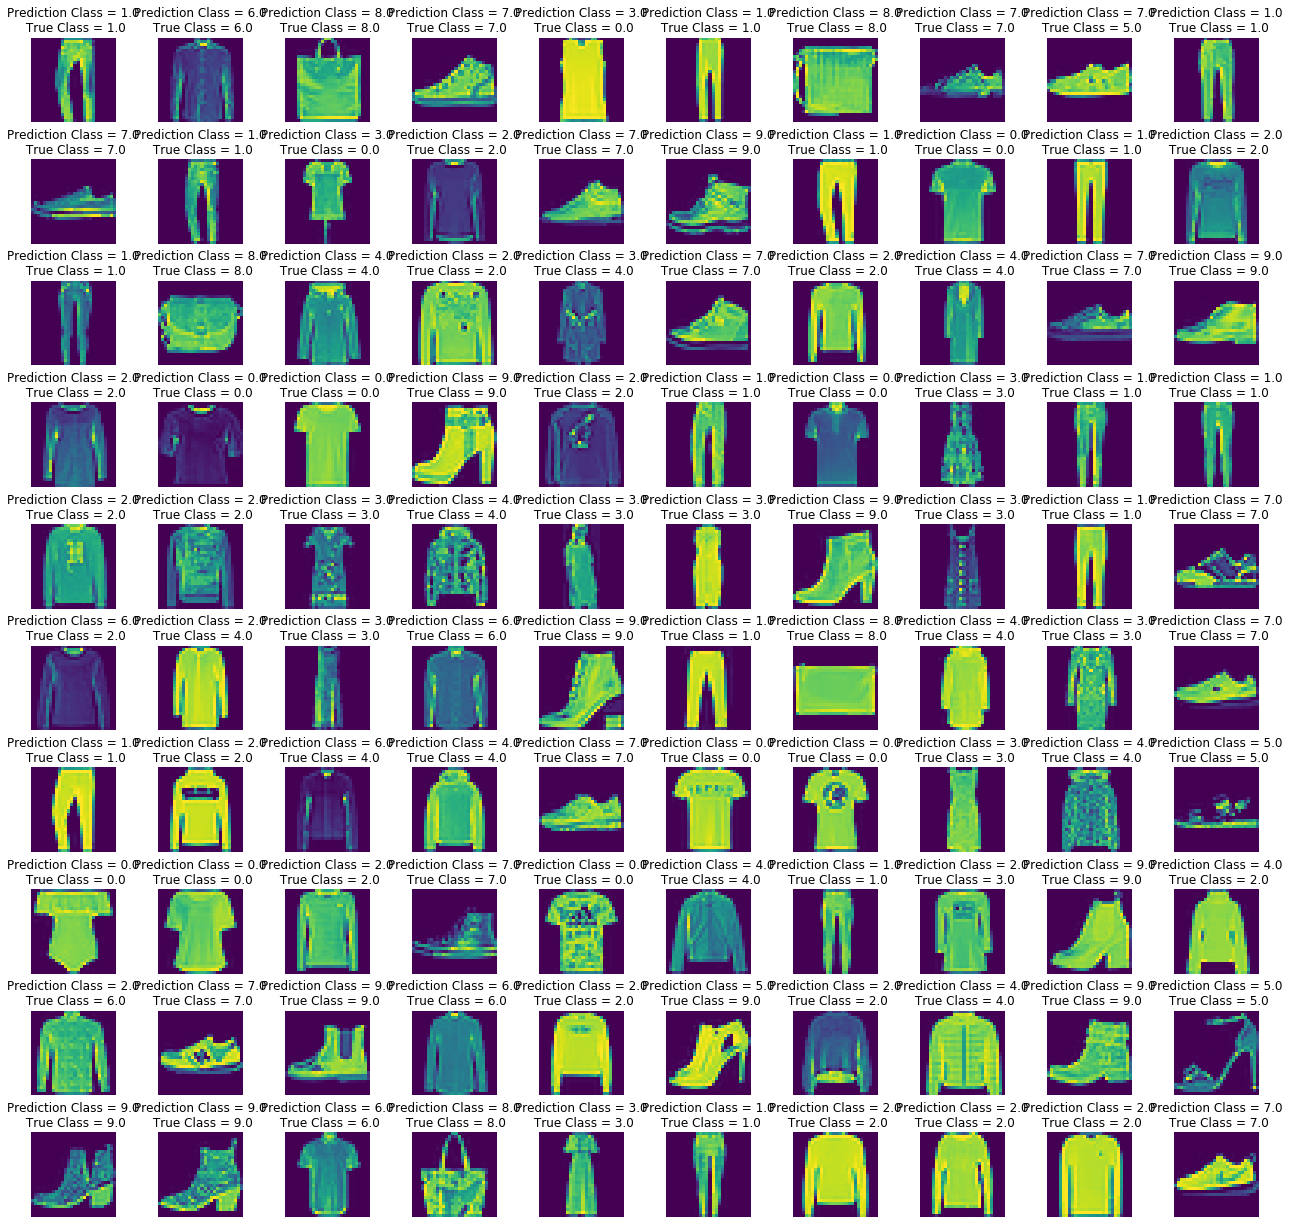

In [27]:
L = 10
W = 10
fig, axes = plt.subplots(L, W, figsize = (22,22))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)